In [547]:
import urllib.request
from tqdm.notebook import tqdm
import six
import requests
from bs4 import BeautifulSoup
import pandas as pd
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [548]:
df_anime = pd.read_csv('anime.csv', converters={'anime_genre': eval})

Имеем dataframe со следующими данными:

"anime_name" - название аниме

"anime_year" - год выхода аниме

"anime_genre" - жанры аниме

"anime_views" - количество просмотров

"number_of_episodes" -количество эпизодов

"anime_url" - ссылка для просмотра

"anime_comments" - количество комментариев

"anime_description" - небольшое описание сюжета

"image" - ссылка на картинку

"ongoing" - индикатор выхода новых серий

In [549]:
df_anime

,anime_name,anime_year,anime_genre,anime_views,number_of_episodes,anime_url,anime_comments,anime_description,image,ongoing
0,Боевой мастер,2020,"[Экшен, Боевые искусства, Драма, История, Фэнт...",240046,145,https://animestars.org/aniserials/video/action...,22,"Судьба героя с экранизации «Боевой мастер», пе...",https://animestars.org/uploads/posts/2020-10/1...,1
1,Нулевой Эдем,2021,"[Комедия, Приключения, Сёнэн, Фантастика, Фэнт...",59717,15,https://animestars.org/aniserials/video/comedy...,19,"Погодите, где-то я это уже видел. Ничего вам э...",https://animestars.org/uploads/posts/2021-03/1...,1
2,Токийские мстители,2021,"[Экшен, Драма, Сёнэн, Школа, Новинки]",80105,15,https://animestars.org/aniserials/video/action...,25,"Помни о своих поступках совершенных в прошлом,...",https://animestars.org/uploads/posts/2021-04/1...,1
3,Герой-рационал перестраивает королевство,2021,"[Война, Гарем, Романтика, Фэнтези, Новинки]",18036,3,https://animestars.org/aniserials/video/war/11...,9,Попав в совершенно другой мир наш с вами главн...,https://animestars.org/uploads/posts/2021-07/1...,1
4,Комендант общежития богинь,2021,"[Гарем, Комедия, Романтика, Сёнэн, Этти, Новинки]",2655,1,https://animestars.org/aniserials/video/garem/...,0,Аниме «Комендант общежития богинь» поведает на...,https://animestars.org/uploads/posts/2021-07/1...,1
...,...,...,...,...,...,...,...,...,...,...
1109,Вельзевул,2011,"[Комедия, Мистика, Повседневность, Приключения...",71005,60,https://animestars.org/aniserials/video/comedy...,15,Ога Тацуми тот еще хулиган и звезда в местной ...,https://animestars.org/uploads/posts/2017-02/m...,0
1110,Жизнь в альтернативном мире с нуля,2016,"[Драма, Приключения, Психология, Сэйнэн, Траге...",119551,25,https://animestars.org/aniserials/video/drama/...,39,"Обычный день, ничего интересного не происходит...",https://animestars.org/uploads/posts/2017-02/m...,0
1111,Список нечисти,2014,"[Комедия, Романтика, Фэнтези, Этти, Китайские]",85128,18,https://animestars.org/aniserials/video/comedy...,19,Злая луна взошла на небо и тьма сгущается. Оча...,https://animestars.org/uploads/posts/2017-02/m...,0
1112,Норн9: Норн + Нонет,2016,"[Гарем для девушек, Приключения, Романтика, Сё...",35988,12,https://animestars.org/aniserials/video/garem-...,8,Сората Сузухара весьма интересный молодой чело...,https://animestars.org/uploads/posts/2017-02/m...,0


In [550]:
df_anime.describe()

,anime_year,anime_views,number_of_episodes,anime_comments,ongoing
count,1114.000000,1.114000e+03,1114.00000,1114.000000,1114.000000
mean,2014.083483,5.437771e+04,22.27289,10.566427,0.033214
std,6.178335,8.489546e+04,45.00599,18.734289,0.179275
min,1983.000000,1.332000e+03,1.00000,0.000000,0.000000
25%,2011.000000,1.698150e+04,12.00000,2.000000,0.000000
50%,2016.000000,3.259600e+04,12.00000,5.000000,0.000000
75%,2019.000000,5.774850e+04,24.00000,11.000000,0.000000
max,2021.000000,1.642868e+06,982.00000,280.000000,1.000000


# Посмотрим некоторые графики и гистограммы:

Количество аниме, вышедших в каждом году. 


Судя по графику больше всего аниме вышло в 2020 году, данная индустрия очень сильно развивается.

Text(0, 0.5, 'Count')

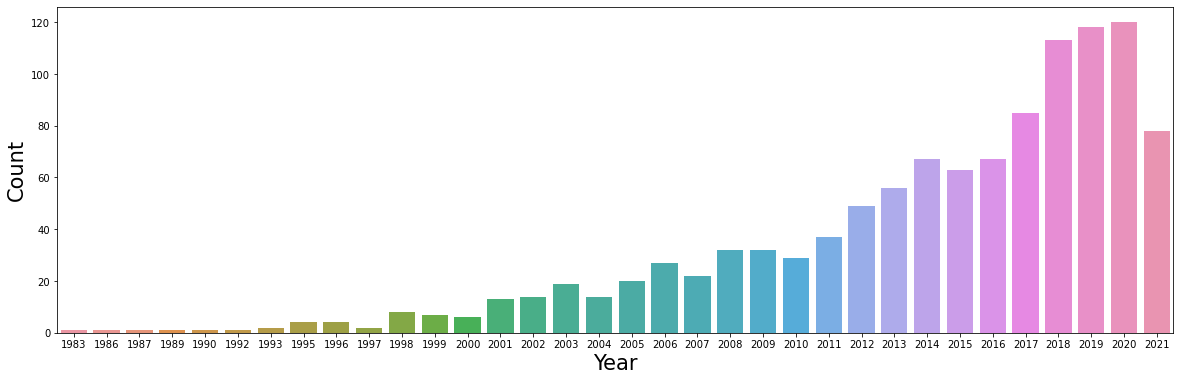

In [551]:
df_count = df_anime['anime_year'].value_counts()
df_count = df_count.reset_index(name='count')
plt.figure(figsize=(20,6))
pl = sns.barplot(x="index", y="count", data=df_count)
pl.set_xlabel('Year', size = 21)
pl.set_ylabel('Count', size = 21)

Посмотрим в какие года выходили наиболее популярные аниме.

Можем увидеть, что наиболее успешными по средним значениям были 2002, 1999, 2017 и 2020.

Text(0, 0.5, 'views')

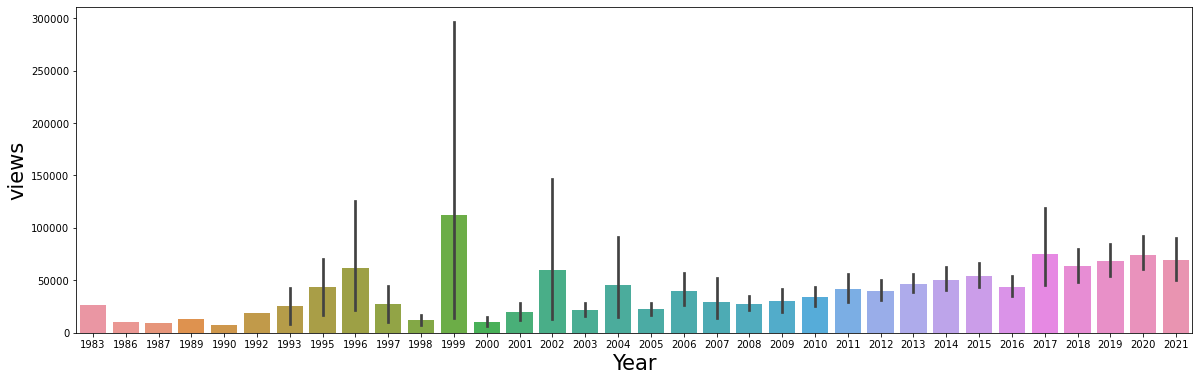

In [553]:
plt.figure(figsize=(20,6))
pl = sns.barplot(x="anime_year", y="anime_views", data=df_anime)
pl.set_xlabel('Year', size = 21)
pl.set_ylabel('views', size = 21)

Видим, что популярные аниме имеют больше комментариев.

Наблюдаем линейную зависимость

Text(0, 0.5, 'View')

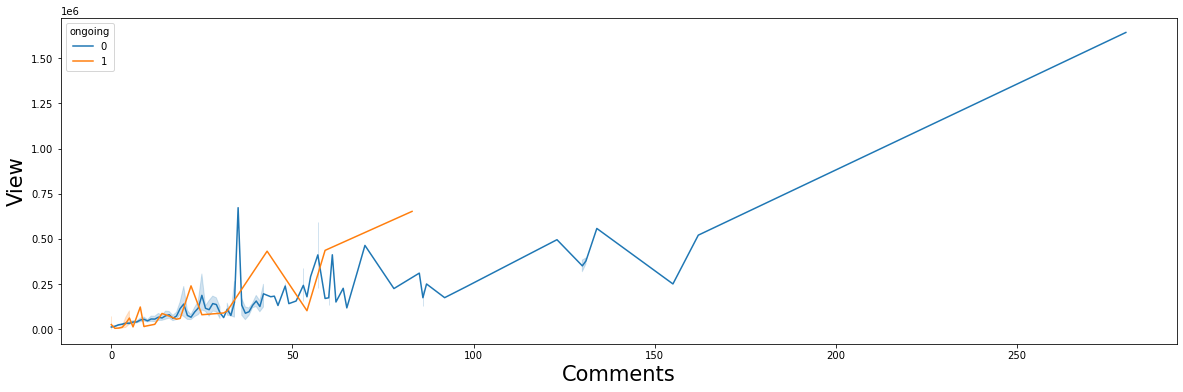

In [554]:
plt.figure(figsize=(20,6))
pl = sns.lineplot(x="anime_comments", y="anime_views", hue = 'ongoing', data=df_anime)
pl.set_xlabel('Comments', size = 21)
pl.set_ylabel('View', size = 21)

Посмотрим, есть ли зависимость между количеством серий, то есть продолжительностью и количеством просмотром.

Также учтем выходят ли новые серии или нет.

Видим, что больше всего просмотров приходится на среднее количество серий от 170 до 300.


Text(0, 0.5, 'Views')

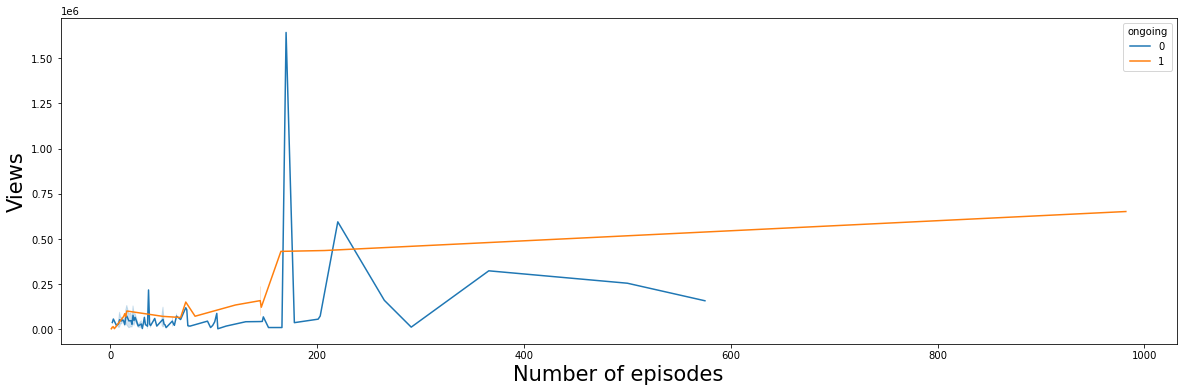

In [555]:
plt.figure(figsize=(20,6))
pl = sns.lineplot(x="number_of_episodes", y="anime_views", hue = 'ongoing', data=df_anime)
pl.set_xlabel('Number of episodes', size = 21)
pl.set_ylabel('Views', size = 21)

Количество аниме каждого жанра. 


Судя по графику самый популярный жанр - комедия, а не имеющий популярности - сказка.

Text(0.5, 0, 'Count')

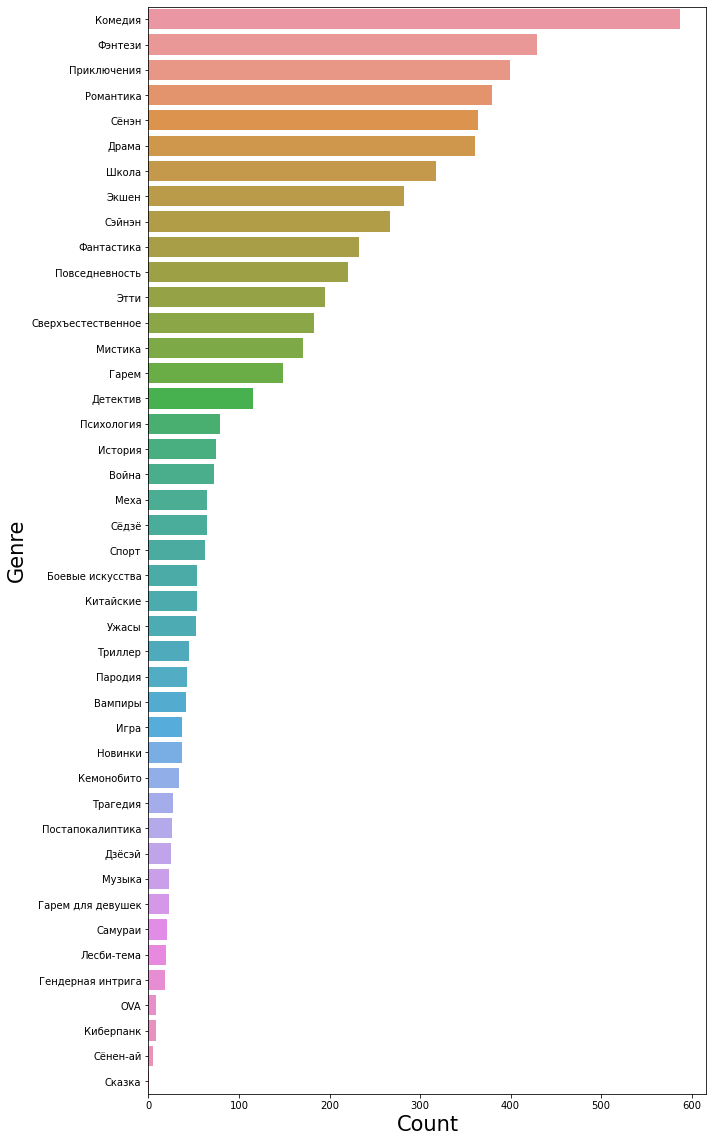

In [556]:
listgenre = []
for i in range(len(df_anime)):
    listgenre += df_anime['anime_genre'][i]
listgenre = [cousine  for cousine in listgenre if not cousine.isdigit()]
df_genre = pd.DataFrame(
    {
        'anime_genre' : listgenre
    }
)
df_genre = df_genre.drop(df_genre[df_genre["anime_genre"] == 'Многосерийные'].index).reset_index(drop=True)
df_count = df_genre['anime_genre'].value_counts()
df_count = df_count.reset_index(name='count')
plt.figure(figsize=(10,20))
pl = sns.barplot(x="count", y="index", data=df_count)
pl.set_ylabel('Genre', size = 21)
pl.set_xlabel('Count', size = 21)

Посмотрим на количество аниме, новые серии которых выходят до сих пор.

На данный момент много аниме 2021 года выходят с новыми сериями.

Но также можно заметить некоторое количество старых аниме, которые выходят и по сей день.

Text(0, 0.5, 'Count')

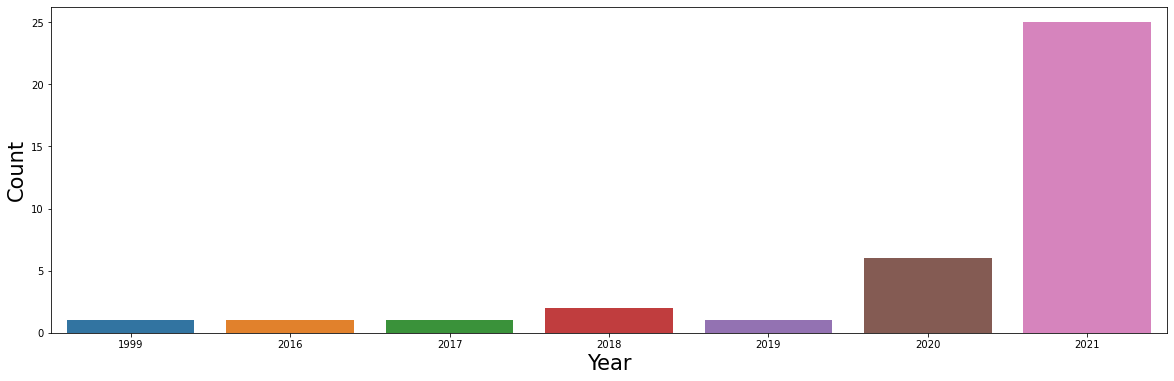

In [557]:
df_ongoing = df_anime[df_anime.ongoing == 1]
df_count = df_ongoing['anime_year'].value_counts()
df_count = df_count.reset_index(name='count')
plt.figure(figsize=(20,6))
pl = sns.barplot(x="index", y="count", data=df_count)
pl.set_xlabel('Year', size = 21)
pl.set_ylabel('Count', size = 21)

Посмотрим для уже законченных аниме зависимость количества серий и года.

Видно, что современны аниме имеют в разы меньше серий, чем старые.

Text(0.5, 0, 'Year')

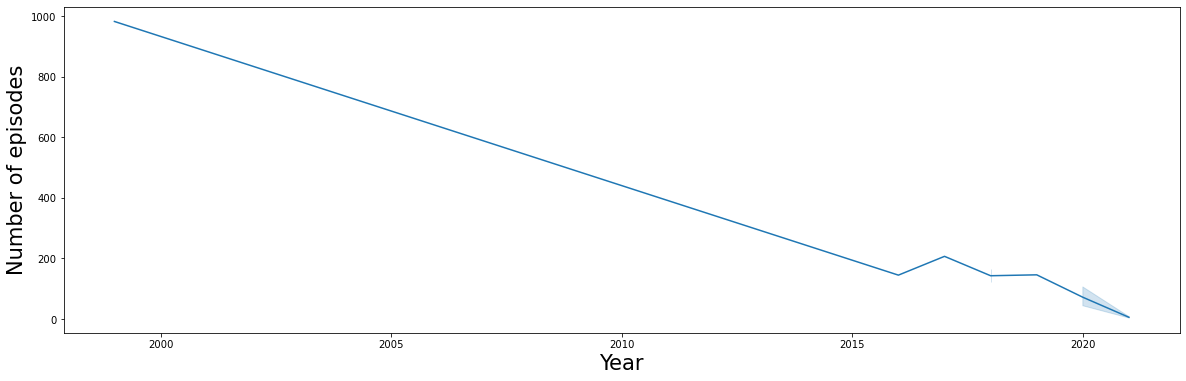

In [558]:
df_notongoing = df_anime[df_anime.ongoing == 1]
plt.figure(figsize=(20,6))
pl = sns.lineplot(y="number_of_episodes", x="anime_year", data=df_notongoing)
pl.set_ylabel('Number of episodes', size = 21)
pl.set_xlabel('Year', size = 21)

Посмотрим корреляцию

In [559]:
corrmat = df.corr()
corrmat

,anime_year,anime_views,number_of_episodes,anime_comments,ongoing
anime_year,1.000000,0.156807,-0.261874,0.242624,0.164544
anime_views,0.156807,1.000000,0.317373,0.831255,0.083770
number_of_episodes,-0.261874,0.317373,1.000000,0.168177,0.177784
anime_comments,0.242624,0.831255,0.168177,1.000000,0.040538
ongoing,0.164544,0.083770,0.177784,0.040538,1.000000


Визуализируем корреляцию

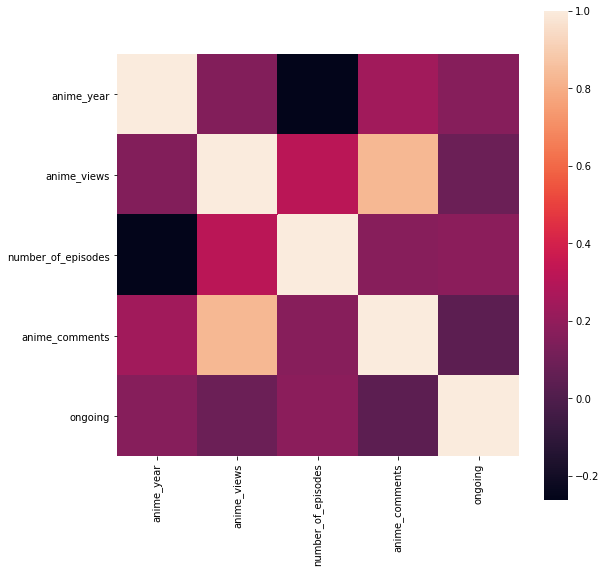

In [560]:
plt.figure(figsize=(9, 9))
sns.heatmap(corrmat, square=True)
plt.show()